# GROUP A - Classifying and Categorising Data using ML Techniques


# Case 1 : Exploring the MNIST Dataset using k-NN

The k-NN is one of the most used labelled data classifiers because of its straightforward but high accuracy performance metric

In [21]:
#importing necessary packages
import seaborn as sn 
import matplotlib.pyplot as plt
#importing dataset
from sklearn.datasets import load_digits
mnist = load_digits() 

In [34]:
#Displaying data set to facilitate understanding
mnist

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [22]:
#Assigning components of the dataset as either the response or explanatory components
x = mnist.data
y = mnist.target 
x,y

(array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 array([0, 1, 2, ..., 8, 9, 8]))

# Brief Data Visualisation

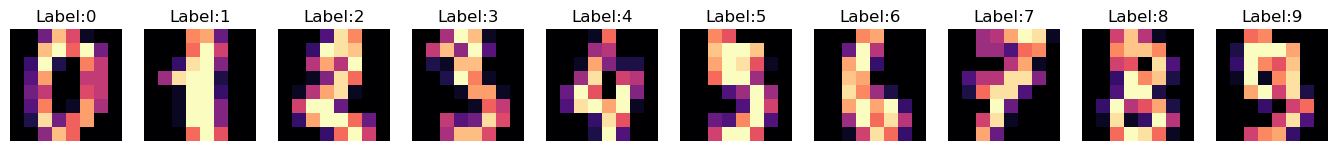

In [23]:
im = mnist.images
fig, axes = plt.subplots(1, 10, figsize=(17, 17))

#Plotting a section of the dataset in the form of 10 subplots

for i, ax in enumerate(axes):
    ax.imshow(im[i], cmap=plt.cm.magma)
    ax.set_title(f"Label:{y[i]}")
    ax.axis("off")

plt.show()

# Splitting the dataset 

In [24]:
from sklearn.model_selection import train_test_split
#Splitting the dataset into 75% training, 25% test data.
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25,random_state = 1, shuffle = True)

# k-NN Classifier

## Weights = Uniform

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train,y_train) #Fitting the algorithm to the training dataset

KNeighborsClassifier(n_neighbors=10)

## Accuracy Evaluation 

In [26]:
knn.score(x_test, y_test) #Evaluating the how accurate the algorithm was in matching test data to labels

0.9933333333333333

In [27]:
from sklearn.metrics import confusion_matrix
y_pred1 = knn.predict(x_test)
cm1 = confusion_matrix(y_test,y_pred1) #Comparing predicted values to actual using the confusion matrix.

Text(95.72222222222221, 0.5, 'Actual')

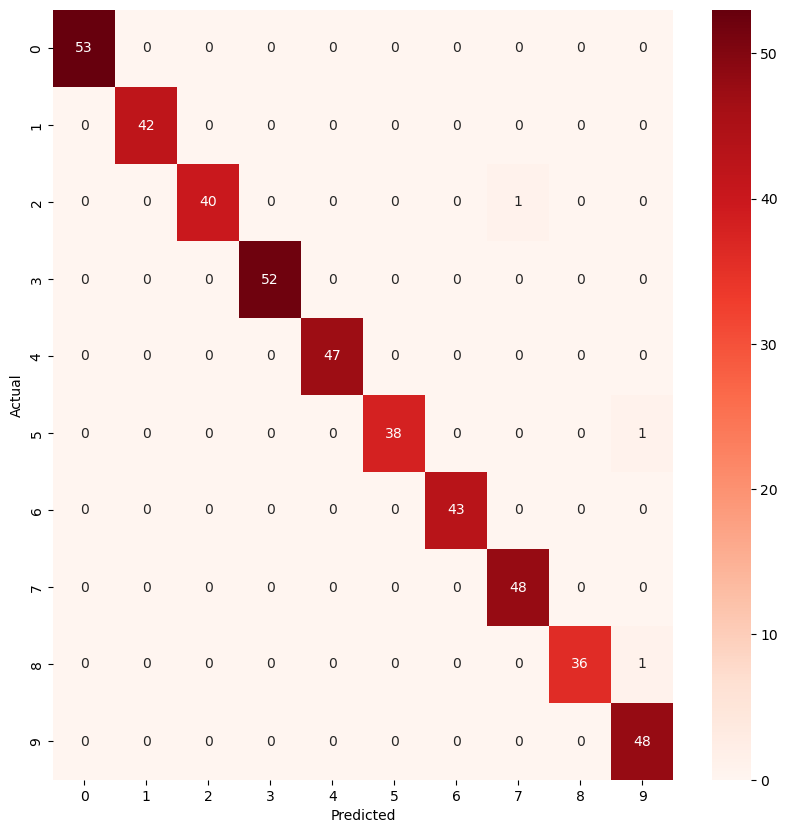

In [29]:
plt.figure(figsize = (10,10))
sn.heatmap(cm1, annot = True, cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual') #Visualizing the confusion matrix

## Weights = Distance

In [30]:
knn = KNeighborsClassifier(n_neighbors = 10, weights = 'distance')
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10, weights='distance')

## Accuracy Evaluation 

In [31]:
knn.score(x_test, y_test)

0.9911111111111112

In [32]:
y_pred2 = knn.predict(x_test)
cm2 = confusion_matrix(y_test,y_pred2)

Text(95.72222222222221, 0.5, 'Actual')

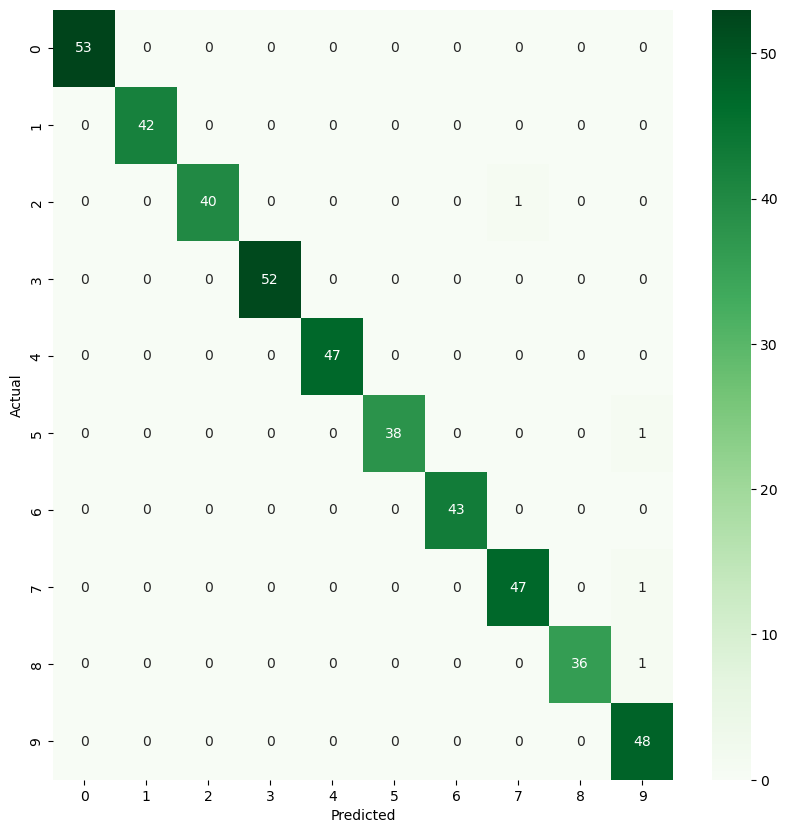

In [33]:
plt.figure(figsize = (10,10))
sn.heatmap(cm2, annot = True, cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Algorithm vrs. Accuracy?

The accuracy of k-NN was not affected in anyway by the choice of algorithm used to compute the nearest neighbors as a change from ball tree, to KD tree to Brute had no significant effect on the accuracy result.

Choice of n_neighbours vrs. Accuracy?

It is also worth mentioning that in a bid to find the number of neighbours that will yield that highest accuracy, it was observed that the value '10' and its immediate surrounding numbers were the only to yield such a high accuracy, anything too high or too low reduced the accuracy of the algorithm drastically.